In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [77]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.15):
            print("\nLoss is low so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

In [78]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip= True
                                  )
train_generator = train_datagen.flow_from_directory(
    './chest_xray/train',
    target_size=(120,120),
    batch_size=20,
    color_mode = 'grayscale',
    class_mode='binary',
    shuffle=True
)

Found 5216 images belonging to 2 classes.


In [79]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    './chest_xray/test',
    target_size=(120,120),
    batch_size=20, 
    color_mode = 'grayscale',
    class_mode='binary',
    shuffle = True
)

Found 624 images belonging to 2 classes.


In [80]:
# model = tf.keras.models.Sequential(
#     [tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(150,150,1)),
#      tf.keras.layers.MaxPool2D(2,2),
#      tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
#      tf.keras.layers.MaxPooling2D(2,2),
#      tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
#      tf.keras.layers.MaxPooling2D(2,2),
#      tf.keras.layers.Flatten(),
#      tf.keras.layers.Dense(256, activation='relu'),
#      tf.keras.layers.BatchNormalization(),
#      tf.keras.layers.Dense(512, activation='relu'),
#      tf.keras.layers.Dropout(0.2),
#      tf.keras.layers.Dense(1, activation='sigmoid')]
# )
# on kaggle
model = tf.keras.models.Sequential([
#     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(120,120,1),padding='same'),
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
#     tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding = 'same'),
#     tf.keras.layers.BatchNormalization(),
    
#     tf.keras.layers.DropOut(0.2),#此处和BN替换实验
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding = 'same'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
#     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
#     tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
#     tf.keras.layers.BatchNormalization(),
    
#     tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding = 'same'),
#     tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [81]:
model.compile(loss = 'mse',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [82]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 120, 120, 32)      320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 14400)            

In [83]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,#100
    epochs=500,
    validation_data=validation_generator,
    validation_steps=50,# 50
    verbose=2,
#     callbacks=[callbacks]
)

Epoch 1/500
100/100 - 37s - loss: 0.1490 - acc: 0.8060 - val_loss: 0.3217 - val_acc: 0.6382
Epoch 2/500
100/100 - 35s - loss: 0.0484 - acc: 0.9335 - val_loss: 0.1458 - val_acc: 0.8202
Epoch 3/500
100/100 - 37s - loss: 0.0423 - acc: 0.9454 - val_loss: 0.2680 - val_acc: 0.7053
Epoch 4/500
100/100 - 36s - loss: 0.0314 - acc: 0.9595 - val_loss: 0.1730 - val_acc: 0.7944
Epoch 5/500
100/100 - 35s - loss: 0.0291 - acc: 0.9595 - val_loss: 0.2251 - val_acc: 0.7398
Epoch 6/500
100/100 - 35s - loss: 0.0264 - acc: 0.9669 - val_loss: 0.2148 - val_acc: 0.7572
Epoch 7/500
100/100 - 36s - loss: 0.0268 - acc: 0.9625 - val_loss: 0.1988 - val_acc: 0.7769
Epoch 8/500
100/100 - 35s - loss: 0.0212 - acc: 0.9719 - val_loss: 0.1572 - val_acc: 0.8181
Epoch 9/500
100/100 - 36s - loss: 0.0178 - acc: 0.9775 - val_loss: 0.1715 - val_acc: 0.8058
Epoch 10/500
100/100 - 39s - loss: 0.0230 - acc: 0.9730 - val_loss: 0.2355 - val_acc: 0.7449
Epoch 11/500
100/100 - 38s - loss: 0.0180 - acc: 0.9795 - val_loss: 0.2786 - va

Epoch 90/500
100/100 - 33s - loss: 0.0015 - acc: 0.9985 - val_loss: 0.2311 - val_acc: 0.7676
Epoch 91/500
100/100 - 34s - loss: 0.0034 - acc: 0.9965 - val_loss: 0.2216 - val_acc: 0.7758
Epoch 92/500
100/100 - 34s - loss: 0.0017 - acc: 0.9980 - val_loss: 0.2432 - val_acc: 0.7541
Epoch 93/500
100/100 - 34s - loss: 0.0021 - acc: 0.9980 - val_loss: 0.2425 - val_acc: 0.7562
Epoch 94/500
100/100 - 33s - loss: 0.0051 - acc: 0.9940 - val_loss: 0.2614 - val_acc: 0.7358
Epoch 95/500
100/100 - 35s - loss: 0.0024 - acc: 0.9975 - val_loss: 0.2278 - val_acc: 0.7717
Epoch 96/500
100/100 - 36s - loss: 0.0018 - acc: 0.9975 - val_loss: 0.2320 - val_acc: 0.7652
Epoch 97/500
100/100 - 34s - loss: 0.0034 - acc: 0.9965 - val_loss: 0.2315 - val_acc: 0.7652
Epoch 98/500
100/100 - 34s - loss: 0.0028 - acc: 0.9970 - val_loss: 0.2326 - val_acc: 0.7655
Epoch 99/500
100/100 - 34s - loss: 0.0048 - acc: 0.9950 - val_loss: 0.1810 - val_acc: 0.8181
Epoch 100/500
100/100 - 35s - loss: 0.0013 - acc: 0.9985 - val_loss: 0

100/100 - 34s - loss: 0.0021 - acc: 0.9980 - val_loss: 0.2643 - val_acc: 0.7314
Epoch 178/500
100/100 - 34s - loss: 0.0020 - acc: 0.9980 - val_loss: 0.2262 - val_acc: 0.7693
Epoch 179/500
100/100 - 34s - loss: 0.0015 - acc: 0.9985 - val_loss: 0.2513 - val_acc: 0.7469
Epoch 180/500
100/100 - 34s - loss: 0.0021 - acc: 0.9980 - val_loss: 0.1943 - val_acc: 0.8028
Epoch 181/500
100/100 - 34s - loss: 0.0010 - acc: 0.9990 - val_loss: 0.2253 - val_acc: 0.7727
Epoch 182/500
100/100 - 36s - loss: 5.5828e-04 - acc: 0.9995 - val_loss: 0.2534 - val_acc: 0.7448
Epoch 183/500
100/100 - 39s - loss: 0.0052 - acc: 0.9945 - val_loss: 0.2752 - val_acc: 0.7226
Epoch 184/500
100/100 - 39s - loss: 0.0019 - acc: 0.9980 - val_loss: 0.2249 - val_acc: 0.7676
Epoch 185/500
100/100 - 36s - loss: 0.0022 - acc: 0.9975 - val_loss: 0.2118 - val_acc: 0.7856
Epoch 186/500
100/100 - 36s - loss: 0.0017 - acc: 0.9980 - val_loss: 0.2335 - val_acc: 0.7655
Epoch 187/500
100/100 - 36s - loss: 0.0010 - acc: 0.9990 - val_loss: 0

Epoch 264/500
100/100 - 110s - loss: 0.0020 - acc: 0.9980 - val_loss: 0.2315 - val_acc: 0.7632
Epoch 265/500
100/100 - 102s - loss: 0.0010 - acc: 0.9990 - val_loss: 0.2434 - val_acc: 0.7541
Epoch 266/500
100/100 - 103s - loss: 0.0010 - acc: 0.9990 - val_loss: 0.2255 - val_acc: 0.7713
Epoch 267/500
100/100 - 111s - loss: 5.0100e-04 - acc: 0.9995 - val_loss: 0.2436 - val_acc: 0.7541
Epoch 268/500
100/100 - 98s - loss: 5.0000e-04 - acc: 0.9995 - val_loss: 0.2266 - val_acc: 0.7707
Epoch 269/500
100/100 - 103s - loss: 0.0025 - acc: 0.9975 - val_loss: 0.2220 - val_acc: 0.7774
Epoch 270/500
100/100 - 109s - loss: 0.0010 - acc: 0.9990 - val_loss: 0.2141 - val_acc: 0.7810
Epoch 271/500
100/100 - 105s - loss: 0.0015 - acc: 0.9985 - val_loss: 0.2316 - val_acc: 0.7683
Epoch 272/500
100/100 - 108s - loss: 4.7873e-14 - acc: 1.0000 - val_loss: 0.2291 - val_acc: 0.7707
Epoch 273/500
100/100 - 110s - loss: 0.0010 - acc: 0.9990 - val_loss: 0.2156 - val_acc: 0.7851
Epoch 274/500
100/100 - 100s - loss: 0.

Epoch 349/500
100/100 - 103s - loss: 5.0000e-04 - acc: 0.9995 - val_loss: 0.2260 - val_acc: 0.7707
Epoch 350/500
100/100 - 110s - loss: 0.0010 - acc: 0.9990 - val_loss: 0.2326 - val_acc: 0.7632
Epoch 351/500
100/100 - 98s - loss: 0.0010 - acc: 0.9990 - val_loss: 0.2294 - val_acc: 0.7676
Epoch 352/500
100/100 - 106s - loss: 9.7266e-14 - acc: 1.0000 - val_loss: 0.2327 - val_acc: 0.7642
Epoch 353/500
100/100 - 107s - loss: 0.0015 - acc: 0.9985 - val_loss: 0.2292 - val_acc: 0.7683
Epoch 354/500
100/100 - 100s - loss: 0.0010 - acc: 0.9990 - val_loss: 0.2299 - val_acc: 0.7665
Epoch 355/500
100/100 - 108s - loss: 5.0100e-04 - acc: 0.9995 - val_loss: 0.2390 - val_acc: 0.7571
Epoch 356/500
100/100 - 101s - loss: 0.0010 - acc: 0.9990 - val_loss: 0.2240 - val_acc: 0.7738
Epoch 357/500
100/100 - 103s - loss: 5.0000e-04 - acc: 0.9995 - val_loss: 0.2347 - val_acc: 0.7622
Epoch 358/500
100/100 - 111s - loss: 0.0010 - acc: 0.9990 - val_loss: 0.2323 - val_acc: 0.7645
Epoch 359/500
100/100 - 98s - loss:

Epoch 434/500
100/100 - 102s - loss: 0.0010 - acc: 0.9990 - val_loss: 0.2447 - val_acc: 0.7520
Epoch 435/500
100/100 - 111s - loss: 0.0010 - acc: 0.9990 - val_loss: 0.2331 - val_acc: 0.7645
Epoch 436/500
100/100 - 101s - loss: 8.2734e-30 - acc: 1.0000 - val_loss: 0.2239 - val_acc: 0.7734
Epoch 437/500
100/100 - 102s - loss: 5.0000e-04 - acc: 0.9995 - val_loss: 0.2277 - val_acc: 0.7696
Epoch 438/500
100/100 - 109s - loss: 0.0010 - acc: 0.9990 - val_loss: 0.2432 - val_acc: 0.7541
Epoch 439/500
100/100 - 100s - loss: 5.0100e-04 - acc: 0.9995 - val_loss: 0.2316 - val_acc: 0.7652
Epoch 440/500
100/100 - 104s - loss: 0.0015 - acc: 0.9985 - val_loss: 0.2338 - val_acc: 0.7634
Epoch 441/500
100/100 - 111s - loss: 2.2480e-27 - acc: 1.0000 - val_loss: 0.2367 - val_acc: 0.7612
Epoch 442/500
100/100 - 98s - loss: 0.0020 - acc: 0.9980 - val_loss: 0.2330 - val_acc: 0.7634
Epoch 443/500
100/100 - 107s - loss: 1.7534e-23 - acc: 1.0000 - val_loss: 0.2337 - val_acc: 0.7645
Epoch 444/500
100/100 - 108s - 

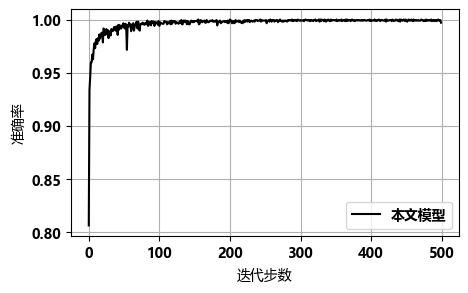

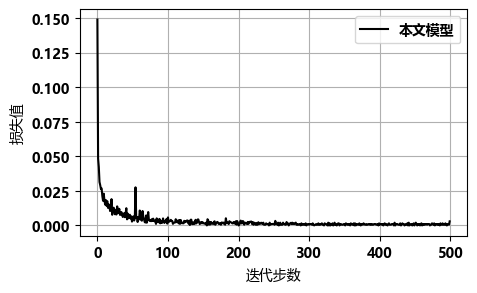

In [94]:
from matplotlib import pyplot as plt
font = {"family":"Microsoft Yahei", "weight":'bold'}
plt.rc('font',**font)
# accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epoches = range(len(acc))
plt.figure(figsize=(5,3),dpi=100)
plt.plot(epoches,acc,label='本文模型',color='black')
plt.grid(0.2)
# plt.plot(epoches, val_acc, label = 'val_acc')
plt.legend()
plt.ylabel("准确率")
plt.xlabel("迭代步数")
plt.show()
plt.figure(figsize=(5,3),dpi=100)
plt.plot(epoches,loss,label='本文模型',color='black')
plt.grid(0.2)
# plt.plot(epoches,val_loss,label='val_loss')
plt.legend()
plt.ylabel("损失值")
plt.xlabel("迭代步数")
plt.show()

In [86]:
np.savetxt("module_1_loss",loss)
np.savetxt("module_1_acc",acc)

In [104]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import os
os.chdir('D:/PycharmProjects/tf2_example/chest_xray/test/NORMAL')
print("以下是正常图像的预测结果：")
time = 0
t = 0
for i in os.listdir():
    try:
        img = load_img(i, target_size=(120, 120), 
                       color_mode='grayscale'
                      )
    except:pass
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=1)
#     print(classes[0])
    if classes[0]==1:
        t+=1
    time+=1
# print("共有",time,'个样本','准确率为:',1-t/time)
os.chdir('D:/PycharmProjects/tf2_example/chest_xray/test/PNEUMONIA')
print("以下是不正常图像的预测结果：")
for i in os.listdir():
    try:
        img = load_img(i, target_size=(120, 120), 
                       color_mode='grayscale'
                      )
    except:
        continue
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=1)
#     print(classes[0])
    if classes[0]==0:
        t+=1
    time+=1
print("共有",time,'个样本','准确率为：',1-t/time)
os.chdir('D:/PycharmProjects/tf2_example')

以下是正常图像的预测结果：
以下是不正常图像的预测结果：
共有 624 个样本 准确率为： 0.8333333333333334


In [54]:
model.save('D:/PycharmProjects/tf2_example/comparay_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: D:/PycharmProjects/tf2_example/comparay_model\assets


In [32]:
os.chdir('D:/PycharmProjects/tf2_example')